# Simple Demo of API use

### Import Required libraries

In [124]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Setting url, coordinates, and response type

In [125]:
params = {
    'pagesize': 100,
    'g': '{"type":"Point","coordinates":[-121.4687,38.5938]}'
}

url_max = 'http://api.cal-adapt.org/api/series/tasmax_year_CNRM-CM5_rcp45/rasters/'
url_min = 'http://api.cal-adapt.org/api/series/tasmin_year_CNRM-CM5_rcp45/rasters/'
# Add HTTP header
headers = {'ContentType': 'json'}


### Make Request and save the response in pandas Dataframe

In [126]:
# Yearly average Maximum Temperature
response = requests.get(url_max, params=params, headers=headers)
data = response.json()
df_max = pd.DataFrame(data['results'])[['event','image']]
df_max.columns = ['Date', 'MaxT']

In [127]:
# Yearly Average Minimum Temperature
response = requests.get(url_min, params=params, headers=headers)
data = response.json()
df_min = pd.DataFrame(data['results'])[['event', 'image']]
df_min.columns = ['Date', 'MinT']

### Merging max and min data frames

In [130]:
df = pd.merge(df_max, df_min, on='Date')
df.head(1)

,Date,MaxT,MinT
0,2006-01-01,297.986603,283.5271


In [131]:
# First change format of `event` field to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Set event field as index
df = df.set_index(['Date'])
df.head(3)

,MaxT,MinT
Date,,
2006-01-01,297.986603,283.527100
2007-01-01,297.772186,284.160645
2008-01-01,297.995544,284.259705


### Change temperature from Kelvin to Fahrenheit

In [132]:
df = df.apply(lambda x: (x - 273.15) * 9 / 5 + 32)
df.head(5)

,MaxT,MinT
Date,,
2006-01-01,76.705885,50.678779
2007-01-01,76.319935,51.819160
2008-01-01,76.721980,51.997468
2009-01-01,75.166591,51.094117
2010-01-01,78.030891,50.224934


### Plotting Average Max and Min yearly temp

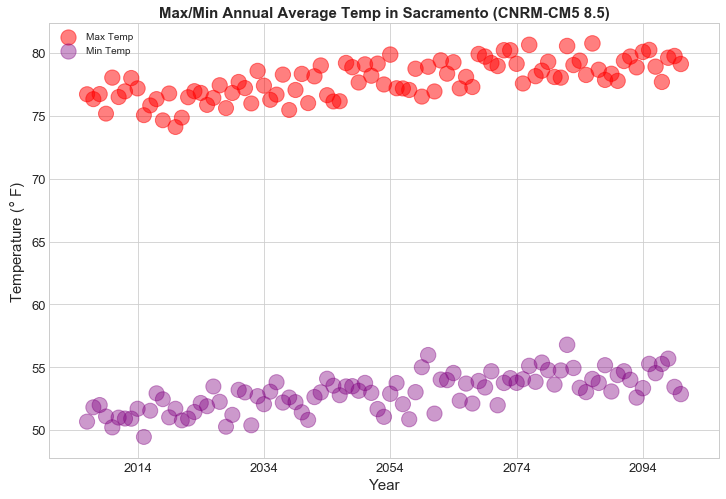

In [139]:
plt.scatter(x = df.index, y = df.MaxT, s = df.MaxT*3 , alpha = 0.5, color='red', label = 'Max Temp')
plt.scatter(x = df.index, y = df.MinT, s = df.MaxT*3 , alpha = 0.4, color='purple', label = 'Min Temp')
plt.style.use('seaborn-whitegrid')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature ($\degree$ F)', fontsize = 15)
plt.title('Max/Min Annual Average Temp in Sacramento (CNRM-CM5 8.5)', weight = 'bold', fontsize = 15)
plt.legend()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('xtick', labelsize = 13)
plt.rc('ytick', labelsize = 13)
plt.show()

### Plotting Maximum Annual Average Temperature  Only 

Text(0.5,1,'Max Annual Average Temp in Sacramento (CNRM-CM5 8.5)')

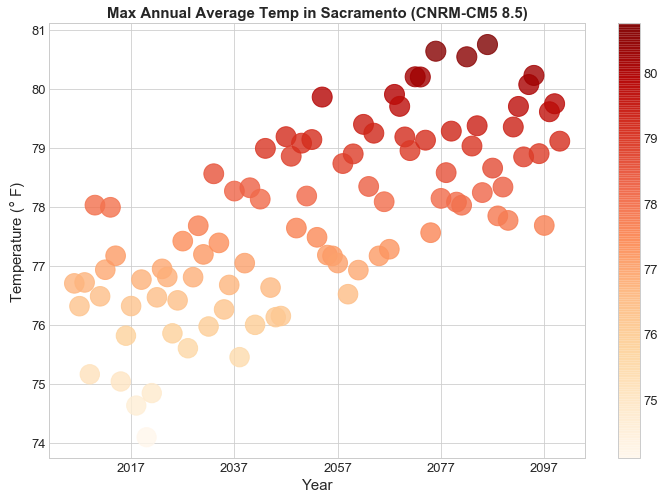

In [140]:
t = df.MaxT
plt.scatter(x = df.index, y = df.MaxT, s = df.MaxT*5 , alpha = 0.8, c = t, label = 'Max Temp', cmap='OrRd')
#plt.scatter(x, y, c=t, cmap='viridis')
plt.colorbar()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature ($\degree$ F)', fontsize = 15)
plt.title('Max Annual Average Temp in Sacramento (CNRM-CM5 8.5)', weight = 'bold', fontsize = 15)